# College Basketball Data Analysis

Doug Beick | Udacity Data Scientist Nanodegree\
April, 2021

The goal in this project is to take data from multiple seasons of college basketball to assess team and conference performance, both in season and postseason.

---
## 3_evaluate_analyze

Using data we cleaned and prepared, I seek to address the questions from the earlier Business Understanding section.

### Import packages and read in data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in our final, clean data set

df = pd.read_csv('datasets/cbbAll.csv')

## Analyze and Visualize data

### Question 1

#### Which conferences produce the best offenses and the best defenses?
We can explore performance by conferences in three different ways:
 1. Which were the top five offensive and defensive conferences, year by year?
 2. Which were the top ten offensive and defensive conferences, out of all year by year results?
 3. Which were the top ten offensive and defensive conferences cumulatively?

#### 1. Year by year performance

In [9]:
# Group data based on season and conference affiliation
years = df['YEAR'].unique()
df_yby = df.groupby(['YEAR', 'CONF']).mean()

In [13]:
# TRANSFORM DATA TO BE EASY TO READ AND TO PLOT
#
# Using grouped data, take the five highest rated conferences in ADJOE (offensive rating) and 
# five lowest rated conferences in ADJDE (defensive rating) in each year. Concatenate each such
# group of five into a single dataframe, one for ADJOE and one for ADJDE. The resultant dataframes
# have each row as a year and each column is a conference, with the cell data representing that
# conference's rating in that year. A cell will be NaN if that conference was not top five in that year.
# Note: Since the data was grouped on two columns, we must unstack the df by one level.

df_off = pd.concat([df_yby[df_yby.index.get_level_values('YEAR') == year]['ADJOE'].nlargest(5).unstack(level=1) for year in years], axis=0)
df_def = pd.concat([df_yby[df_yby.index.get_level_values('YEAR') == year]['ADJDE'].nsmallest(5).unstack(level=1) for year in years], axis=0)

In [12]:
df_off.head()

CONF,B10,BE,ACC,P12,B12,SEC
YEAR,,,,,,
2013,109.891667,107.74,107.466667,106.958333,106.88,NaN
2014,112.575000,111.91,111.800000,110.983333,113.58,NaN
2015,110.514286,110.97,111.033333,108.233333,110.33,NaN
2016,110.057143,111.10,113.506667,110.991667,113.42,NaN
2017,110.928571,112.79,114.560000,109.966667,114.81,NaN


##### Plot top offensive conferences

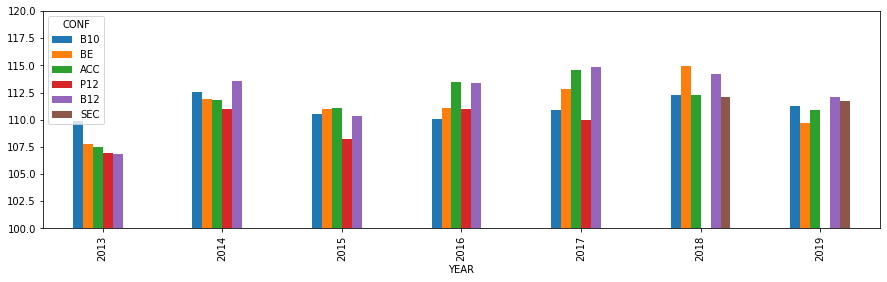

In [11]:
df_off.plot(y=[col for col in df_off.columns], kind='bar', figsize=(15,4), ylim=(100,120))
plt.show()

For our top offenses, we look for the conferences with the highest values. We can see B10, BE, ACC, and B12 represented in every year, while P12 and SEC take turns. In some years, like 2013, one conference is clearly superior, while in others, like 2015 or 2016, there are multiple conferences near the top.

##### Plot top defensive conferences

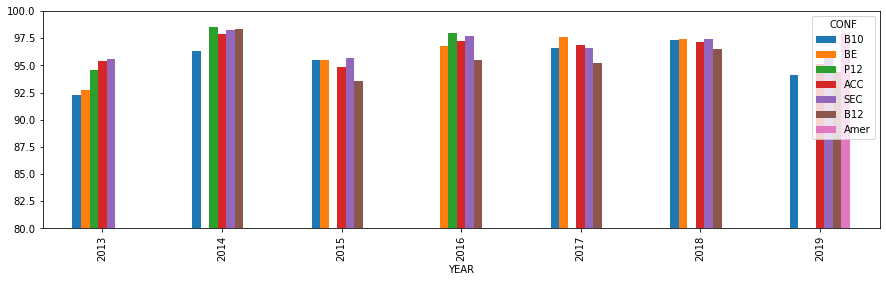

In [86]:
df_def.plot(y=[col for col in df_def.columns], kind='bar', figsize=(15,4), ylim=(80,100))
plt.show()

For our top defenses, we look for the conferences with the lowest values. Here, only ACC and SEC appear every year, while five other conferences sharing the remaining spots. Interesting to note that while they do appear every year, neither ACC nor SEC ever have the lowest/best value. On the other hand, B12, which failed to make the cut in 2013, is the best conferences in four of the years, perhaps five (2019 is close).

#### 2. Top single season performances

##### Offense

In [14]:
# Use grouped data from earlier and pull ten best offenses. Since it is grouped by
# year and conference already, we easily see which performances were best.

top_off_single = df_yby['ADJOE'].nlargest(10)
top_off_single

YEAR  CONF
2018  BE      114.920000
2017  B12     114.810000
      ACC     114.560000
2018  B12     114.210000
2014  B12     113.580000
2016  ACC     113.506667
      B12     113.420000
2017  BE      112.790000
2014  B10     112.575000
2018  ACC     112.273333
Name: ADJOE, dtype: float64

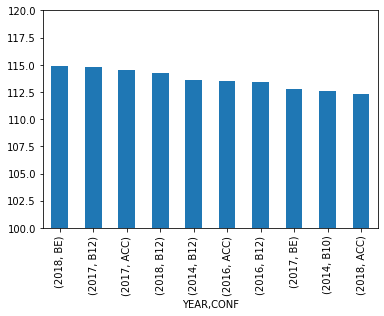

In [107]:
top_off_single.plot.bar(ylim=(100,120))
plt.show()

We can see B12 and ACC each appear three or more times. There also does not appear to be significant stratification among the results, indicating no anomalies or outliers.

##### Defense

In [15]:
# Use grouped data from earlier and pull ten best defenses. Since it is grouped by
# year and conference already, we easily see which performances were best.

top_def_single = df_yby['ADJDE'].nsmallest(10)
top_def_single

YEAR  CONF
2013  B10     92.250000
      BE      92.686667
2015  B12     93.560000
2019  B10     94.114286
      B12     94.380000
2013  P12     94.550000
2015  ACC     94.826667
2019  ACC     95.140000
2017  B12     95.230000
2013  ACC     95.383333
Name: ADJDE, dtype: float64

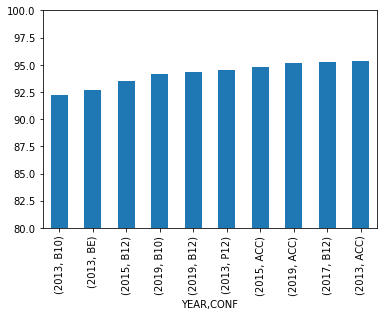

In [108]:
top_def_single.plot.bar(ylim=(80,100))
plt.show()

We can see B12 and ACC again appear the most, three times each. There also does not appear to be significant stratification among the results, indicating no anomalies or outliers.

#### 3. Top cumulative performances

In [5]:
# Group all data by conference affiliation, average each column
df_cum = df.groupby('CONF').mean()

# Pull aside the best offenses and defenses
top_off_cum = df_cum['ADJOE'].nlargest(10)
top_def_cum = df_cum['ADJDE'].nsmallest(10)

##### Offense

Top Offenses:
 CONF
B12     112.184286
ACC     111.776471
BE      111.068000
B10     111.055319
SEC     109.404082
P12     109.057143
Amer    106.541791
WCC     106.437681
A10     105.659596
MWC     105.153333
Name: ADJOE, dtype: float64


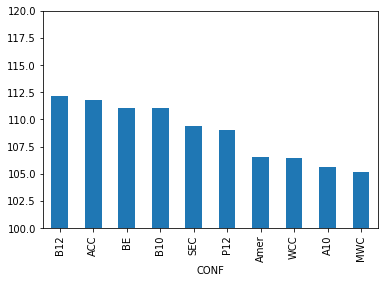

In [110]:
print("Top Offenses:\n", top_off_cum)
top_off_cum.plot.bar(ylim=(100,120))
plt.show()

For the first time in our plots, we can see notable stratifying. The bottom four of the ten are visibly lower in rating. The middle two appear to be in their own tier as well.

##### Defense

Top Defenses:
 CONF
B12      95.584286
B10      95.886170
ACC      96.393137
BE       96.610667
SEC      96.762245
P12      98.389286
Amer     99.308955
A10     100.141414
MVC     100.370000
MWC     101.026667
Name: ADJDE, dtype: float64


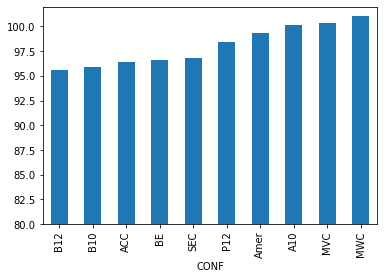

In [112]:
print("Top Defenses:\n", top_def_cum)
top_def_cum.plot.bar(ylim=(80,102))
plt.show()

Unlike the multiple tiers on offense, we see two groupings here. The first are the top five, who are closely rated and have only a slight difference between them. Then there are the next five, who have a steeper drop off at each point. So, we have a clear top tier and consistent drop off thereafter.

### Conclusions

We can see in all cases that certain conferences arise toward the top. On offense, there tended to be more stratification, with B12 and ACC being the preeminent entries, while on defense, those two conferences' advantage melted away a little and we were left with a group of four or five conferences.

In both offense and defense, in all three parts, we saw the so-called Major conferences (ACC, BE, B10, B12, P12, SEC) consistently have the best results. We will explore more around these Major conferences in Question 3.

_Answers_: The Big 12 and the ACC clearly produce the best offenses. On defense, those two conferences remain among the top, though in a larger group of contenders.

## Question 2

### Is a team with a better offense or a better defense more likely to have the most wins?
 1. What is the correlation between offensive and defensive efficiency and in-season win percentage (`PRE_PC`)?
 2. What is the correlation between offensive and defensive efficiency and tournament performance (`PFPC`)?
 
*Note*  
In this section, we make use of correlation coefficients and scatter plots. Both tools are useful for seeing the strength of a relationship.

#### 1. Team efficiency vs win percentage

##### Offense

In [2]:
season_off = np.corrcoef(df['ADJOE'], df['PRE_PC'])
season_off

array([[1.        , 0.71935103],
       [0.71935103, 1.        ]])

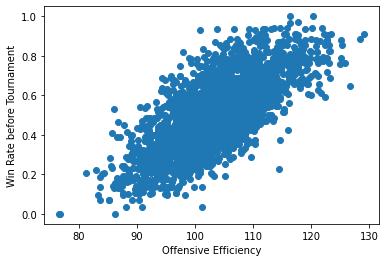

In [3]:
plt.scatter(df['ADJOE'], df['PRE_PC'])
plt.xlabel("Offensive Efficiency")
plt.ylabel("Win Rate before Tournament")
plt.show()

##### Defense

In [4]:
season_def = np.corrcoef(df['ADJDE'], df['PRE_PC'])
season_def

array([[ 1.        , -0.65386466],
       [-0.65386466,  1.        ]])

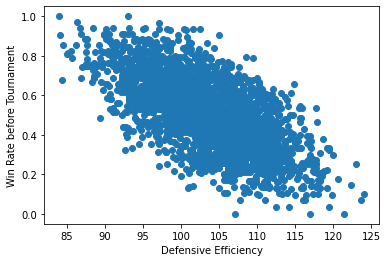

In [5]:
plt.scatter(df['ADJDE'], df['PRE_PC'])
plt.xlabel("Defensive Efficiency")
plt.ylabel("Win Rate before Tournament")
plt.show()

##### Net

In [8]:
season_net = np.corrcoef([df['ADJOE']-df['ADJDE']], df['PRE_PC'])
season_net

array([[1.       , 0.7987837],
       [0.7987837, 1.       ]])

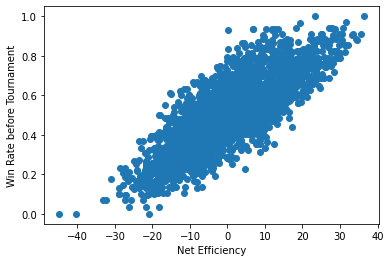

In [9]:
plt.scatter([df['ADJOE']-df['ADJDE']], df['PRE_PC'])
plt.xlabel("Net Efficiency")
plt.ylabel("Win Rate before Tournament")
plt.show()

With a coefficient closer in absolute value to 1, we can see offense is more strongly related to winning percentage than is defense. However, when we use the net difference between offensive and defensive rating, we get a significantly stronger relationship still. Having so much stronger of a relationship in the net rating means that a team is better off improving both their offense and defense, rather than focusing on just one.

#### 2. Team efficiency vs postseason performance

##### Offense

In [10]:
post_off = np.corrcoef(df['ADJOE'], df['PFPC'])
post_off

array([[1.        , 0.56060972],
       [0.56060972, 1.        ]])

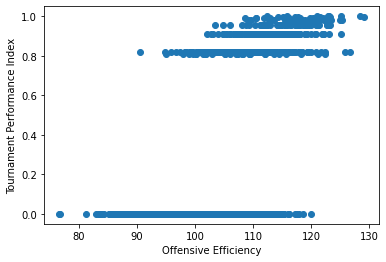

In [11]:
plt.scatter(df['ADJOE'], df['PFPC'])
plt.xlabel("Offensive Efficiency")
plt.ylabel("Tournament Performance Index")
plt.show()

##### Defense

In [12]:
post_def = np.corrcoef(df['ADJDE'], df['PFPC'])
post_def

array([[ 1.        , -0.50678327],
       [-0.50678327,  1.        ]])

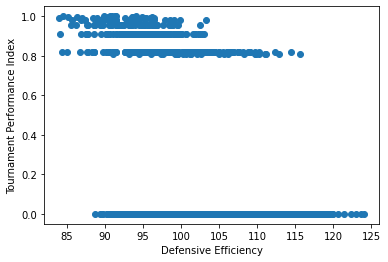

In [13]:
plt.scatter(df['ADJDE'], df['PFPC'])
plt.xlabel("Defensive Efficiency")
plt.ylabel("Tournament Performance Index")
plt.show()

##### Net

In [14]:
post_net = np.corrcoef([df['ADJOE']-df['ADJDE']], df['PFPC'])
post_net

array([[1.       , 0.6209838],
       [0.6209838, 1.       ]])

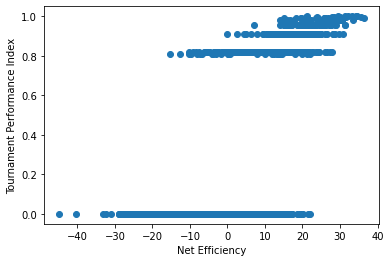

In [15]:
plt.scatter([df['ADJOE']-df['ADJDE']], df['PFPC'])
plt.xlabel("Net Efficiency")
plt.ylabel("Tournament Performance Index")
plt.show()

As in part 1, offense is more strongly related to winning percentage than is defense, and net rating has the strongest relationship of all. While the correlation coefficients appear significantly weaker than in part 1, this is primarily due to the significant stratifying of data in the PFPC column. If we were to study this relationship further, it would be advantageous if not necessary to find a better variable to reflect postseason achievement.

### Conclusions

_Answers_: In an either/or case, offense is more likely than defense to lead to a team's success. If we look at teams that excel in both aspects though, we unsurprisingly find that excellence in both has the strongest relationship to winning.

## Question 3

### Is there a bias toward the "Major" conferences (ACC, Big East, Big Ten, Big 12, Pac-12, SEC) in how the postseason tournament is seeded?
 1. Do non-major teams on average need to have a higher power ranking than major teams in order to earn a top-4 seed?
 2. Do non-major teams of comparable power ranking to major teams achieve comparable postseason success?  

If the answer is Yes to both questions, it would indicate a bias in favor of the major teams, since they earn better seeds despite equal performance



In [7]:
majors = ['ACC', 'BE', 'B10', 'B12', 'P12', 'SEC']

#### 1. Average power rankings of top-4 seeds

In [8]:
# Subset the major conference top seeds and non-major conference top seeds.
# df_maj_t4 = Major conf
# df_nmj_t4 = Non-major conf

df_maj_t4 = df[(df['CONF'].isin(majors)) & (df['SEED'].isin([1,2,3,4]))]
df_nmj_t4 = df[~(df['CONF'].isin(majors)) & (df['SEED'].isin([1,2,3,4]))]

In [9]:
# Use dataframe method to get the average value for each of power ranking, offensive efficiency, and defensive efficiency.
# We print these values on successive lines to easily compare.

print("Average Power Ranking for top-4 seeds:")
print("\tMajor conference:\t", df_maj_t4['BARTHAG'].mean().round(4))
print("\tNon-major conference:\t", df_nmj_t4['BARTHAG'].mean().round(4))

print("\nAverage Offensive Effiency for top-4 seeds:")
print("\tMajor conference:\t", df_maj_t4['ADJOE'].mean().round(4))
print("\tNon-major conference:\t", df_nmj_t4['ADJOE'].mean().round(4))

print("\nAverage Defensive Efficiency for top-4 seeds:")
print("\tMajor conference:\t", df_maj_t4['ADJDE'].mean().round(4))
print("\tNon-major conference:\t", df_nmj_t4['ADJDE'].mean().round(4))


Average Power Ranking for top-4 seeds:
	Major conference:	 0.9364
	Non-major conference:	 0.9313

Average Offensive Effiency for top-4 seeds:
	Major conference:	 117.8929
	Non-major conference:	 115.7923

Average Defensive Efficiency for top-4 seeds:
	Major conference:	 92.601
	Non-major conference:	 91.1692


#### 2. Average postseason result of top-4 seeds

In [10]:
# Again use the mean() method to easily see how well major and non-major conferences do on average,
# and compare the two values.

print("Average Postseason Performance Result for top-4 seeds:")
print("\tMajor conference:\t", df_maj_t4['PFPC'].mean().round(4))
print("\tNon-major conference:\t", df_nmj_t4['PFPC'].mean().round(4))

Average Postseason Performance Result for top-4 seeds:
	Major conference:	 0.9441
	Non-major conference:	 0.9285


In [11]:
# For an alternative view, we put the same values in the preceding cells into a simple table.

data = [[df_maj_t4['BARTHAG'].mean().round(4), df_nmj_t4['BARTHAG'].mean().round(4)],
        [df_maj_t4['ADJOE'].mean().round(4), df_nmj_t4['ADJOE'].mean().round(4)],
        [df_maj_t4['ADJDE'].mean().round(4), df_nmj_t4['ADJDE'].mean().round(4)],
        [df_maj_t4['PFPC'].mean().round(4), df_nmj_t4['PFPC'].mean().round(4)]]

columns = ('Major Conf', 'Non-Major Conf')
rows = ['Power Ranking', 'Offensive Eff', 'Defensive Eff', 'Postseason Percentile']

top4 = pd.DataFrame(data=data, index=rows, columns=columns)
top4

,Major Conf,Non-Major Conf
Power Ranking,0.9364,0.9313
Offensive Eff,117.8929,115.7923
Defensive Eff,92.6010,91.1692
Postseason Percentile,0.9441,0.9285


### Conclusions

Major conferences have, on average, a better power ranking, better offense, and worse defense than Non-major conferences. The Majors also have a noticeably, though not extremely, better finish in the postseason tournament on average. Since Major conference teams are superior in two of the three statistical rankings and follow that up with superior postseason performance, there would not appear to be any bias in awarding top seeds to the Major teams that earn them. In fact, considering that Non-major teams usually do not advance as far as Major teams in the tournament, one would more easily argue that it is the Non-majors who have a bias in their favor.

_Answer_: There is not evidence of any bias in favor on Major conference teams when seeding the postseasons tournament.

# Overall Conclusions

We examined where to find the best offenses and defenses, whether offense or defense leads to more wins, and whether teams from Major conferences are at in advantage when earning seeds into the postseason tournament.

In our findings, the Major conferences produced the best offenses and defenses, with the Big 12 and ACC being particularly strong in both regards. We also saw that stronger offensive teams usually have a better advantage toward winning than stronger defensive teams. Finally, we saw that Major conference teams are usually stronger than their Non-major counterparts in the statistical categories AND in postseason performance.

Drawing on these findings, we see that the Major conferences have higher performance throughout a college basketball season.